In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='xgboost')  # Suppress XGBoost warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.discriminant_analysis')  # Suppress collinearity warnings

In [2]:
df = pd.read_csv('data/public/kaggle_insurance_churn.csv')
df.head()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0
3,2.213016e+11,5.213006e+11,992.409561,130.0,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,2021-12-22,1
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN,0


In [3]:
df.describe()

,individual_id,address_id,curr_ann_amt,days_tenure,age_in_years,latitude,longitude,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn
count,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.427190e+06,1.427190e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06
mean,2.213018e+11,5.213007e+11,9.403140e+02,3.602007e+03,5.581648e+01,3.285130e+01,-9.694764e+01,8.149773e+04,5.221336e-01,7.501612e+00,8.201003e-01,3.515033e-01,8.411937e-01,1.150901e-01
std,9.926327e+05,4.174711e+05,2.465392e+02,2.341005e+03,1.455192e+01,1.944458e-01,2.963725e-01,5.438100e+04,4.995100e-01,5.135309e+00,3.841040e-01,4.774399e-01,3.654955e-01,3.191308e-01
min,2.213000e+11,5.213000e+11,-1.943131e+02,2.000000e+01,2.300000e+01,3.199061e+01,-9.802223e+01,5.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.213009e+11,5.213003e+11,7.721025e+02,1.398000e+03,4.500000e+01,3.271247e+01,-9.716765e+01,4.750000e+04,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.213018e+11,5.213007e+11,9.350098e+02,3.651000e+03,5.500000e+01,3.284678e+01,-9.690326e+01,7.000000e+04,1.000000e+00,6.801000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.213027e+11,5.213010e+11,1.102992e+03,6.291000e+03,6.400000e+01,3.298491e+01,-9.672065e+01,8.750000e+04,1.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,2.213033e+11,5.213015e+11,2.269374e+03,6.291000e+03,1.140000e+02,3.354658e+01,-9.607035e+01,2.500000e+05,1.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
df.shape

(1680909, 22)

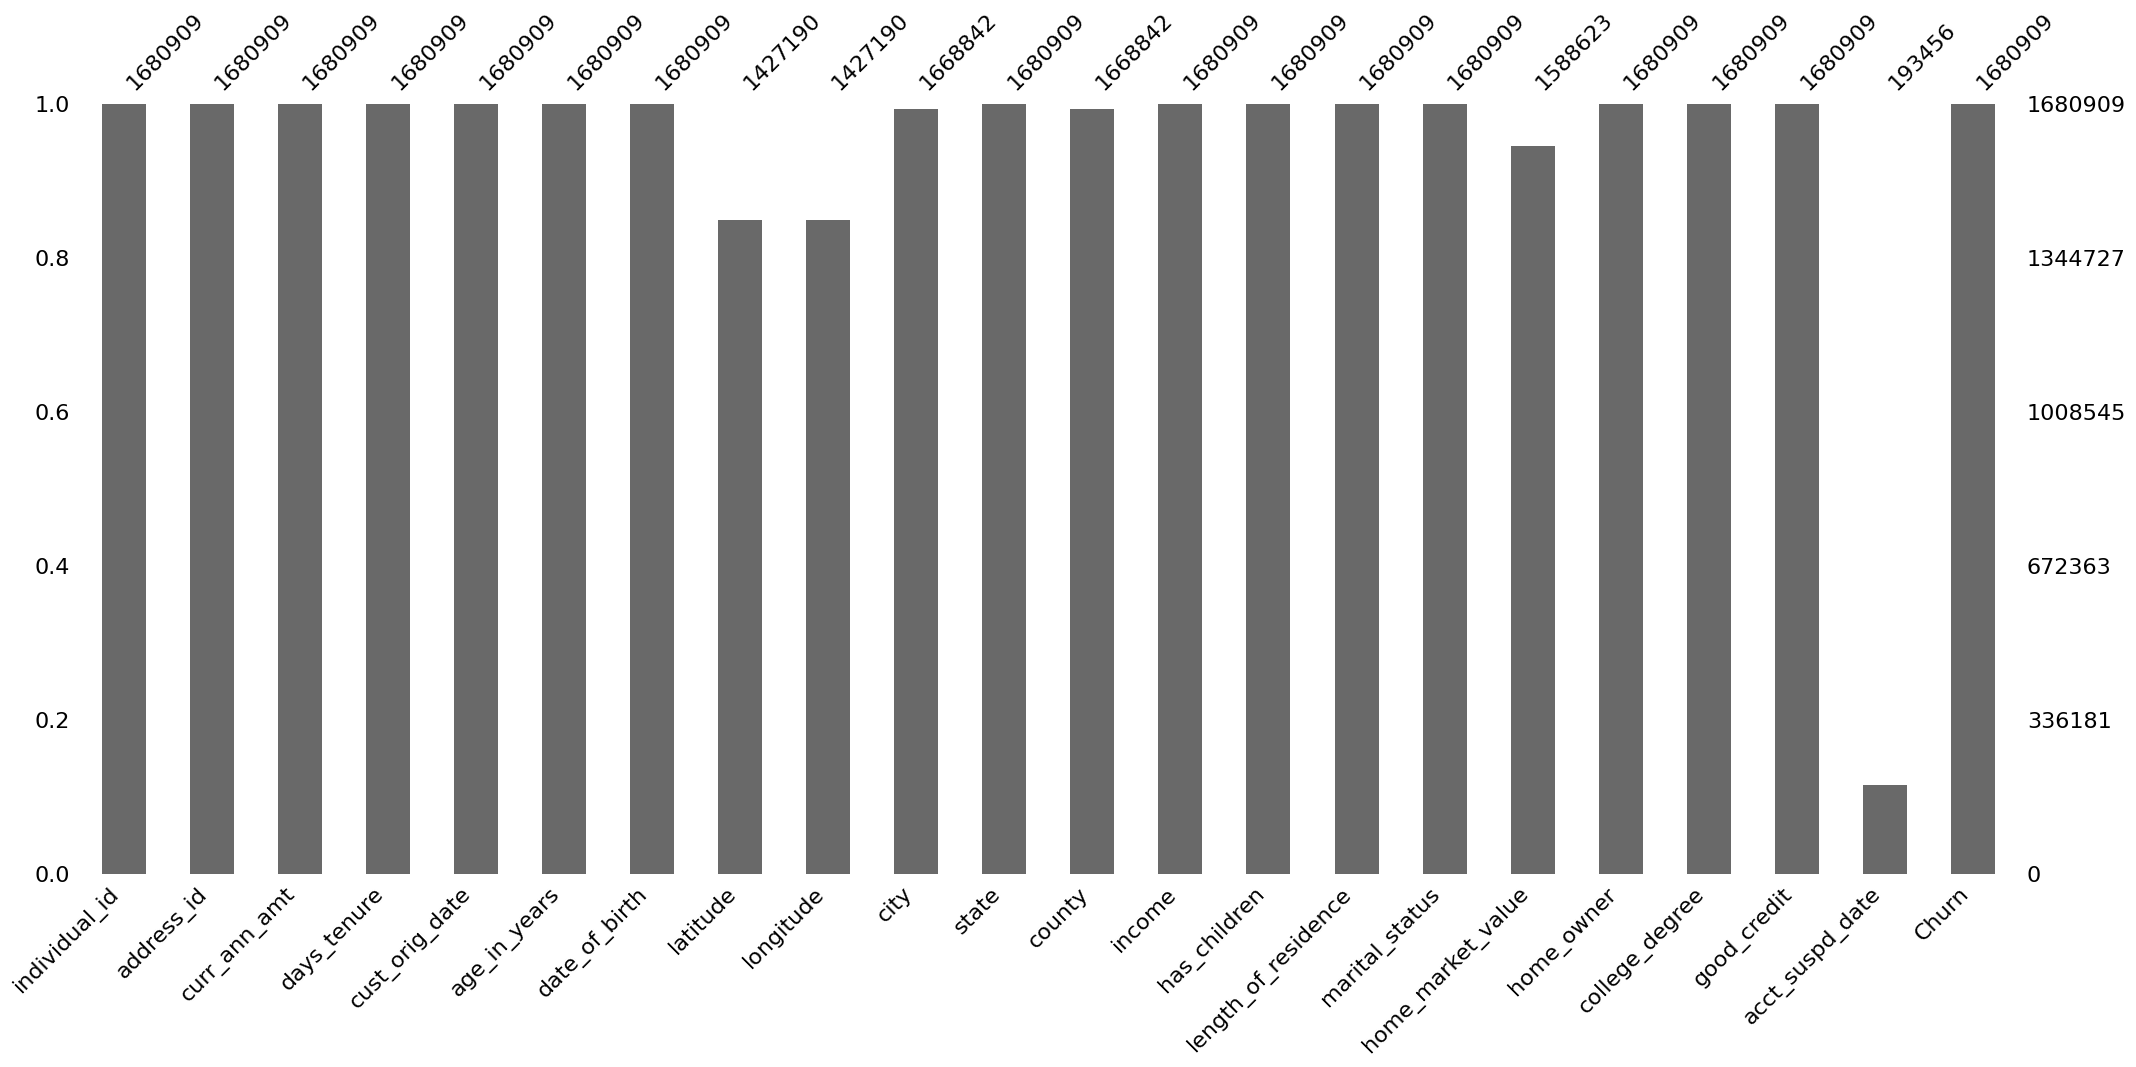

In [5]:
# df.isna().sum()
ms.bar(df)
plt.show()

In [6]:
df['county'] = df['county'].fillna(df['county'].mode()[0])

In [7]:
df['home_market_value'] = df['home_market_value'].fillna(df['home_market_value'].mode()[0])

In [8]:
# dropping columns which are not necessary for prediction

to_drop = [
    'individual_id',
    'address_id',
    'cust_orig_date',
    'date_of_birth',
    'city',
    'state',
    'latitude',
    'longitude',
    'acct_suspd_date'
]

df.drop(to_drop, inplace = True, axis = 1)

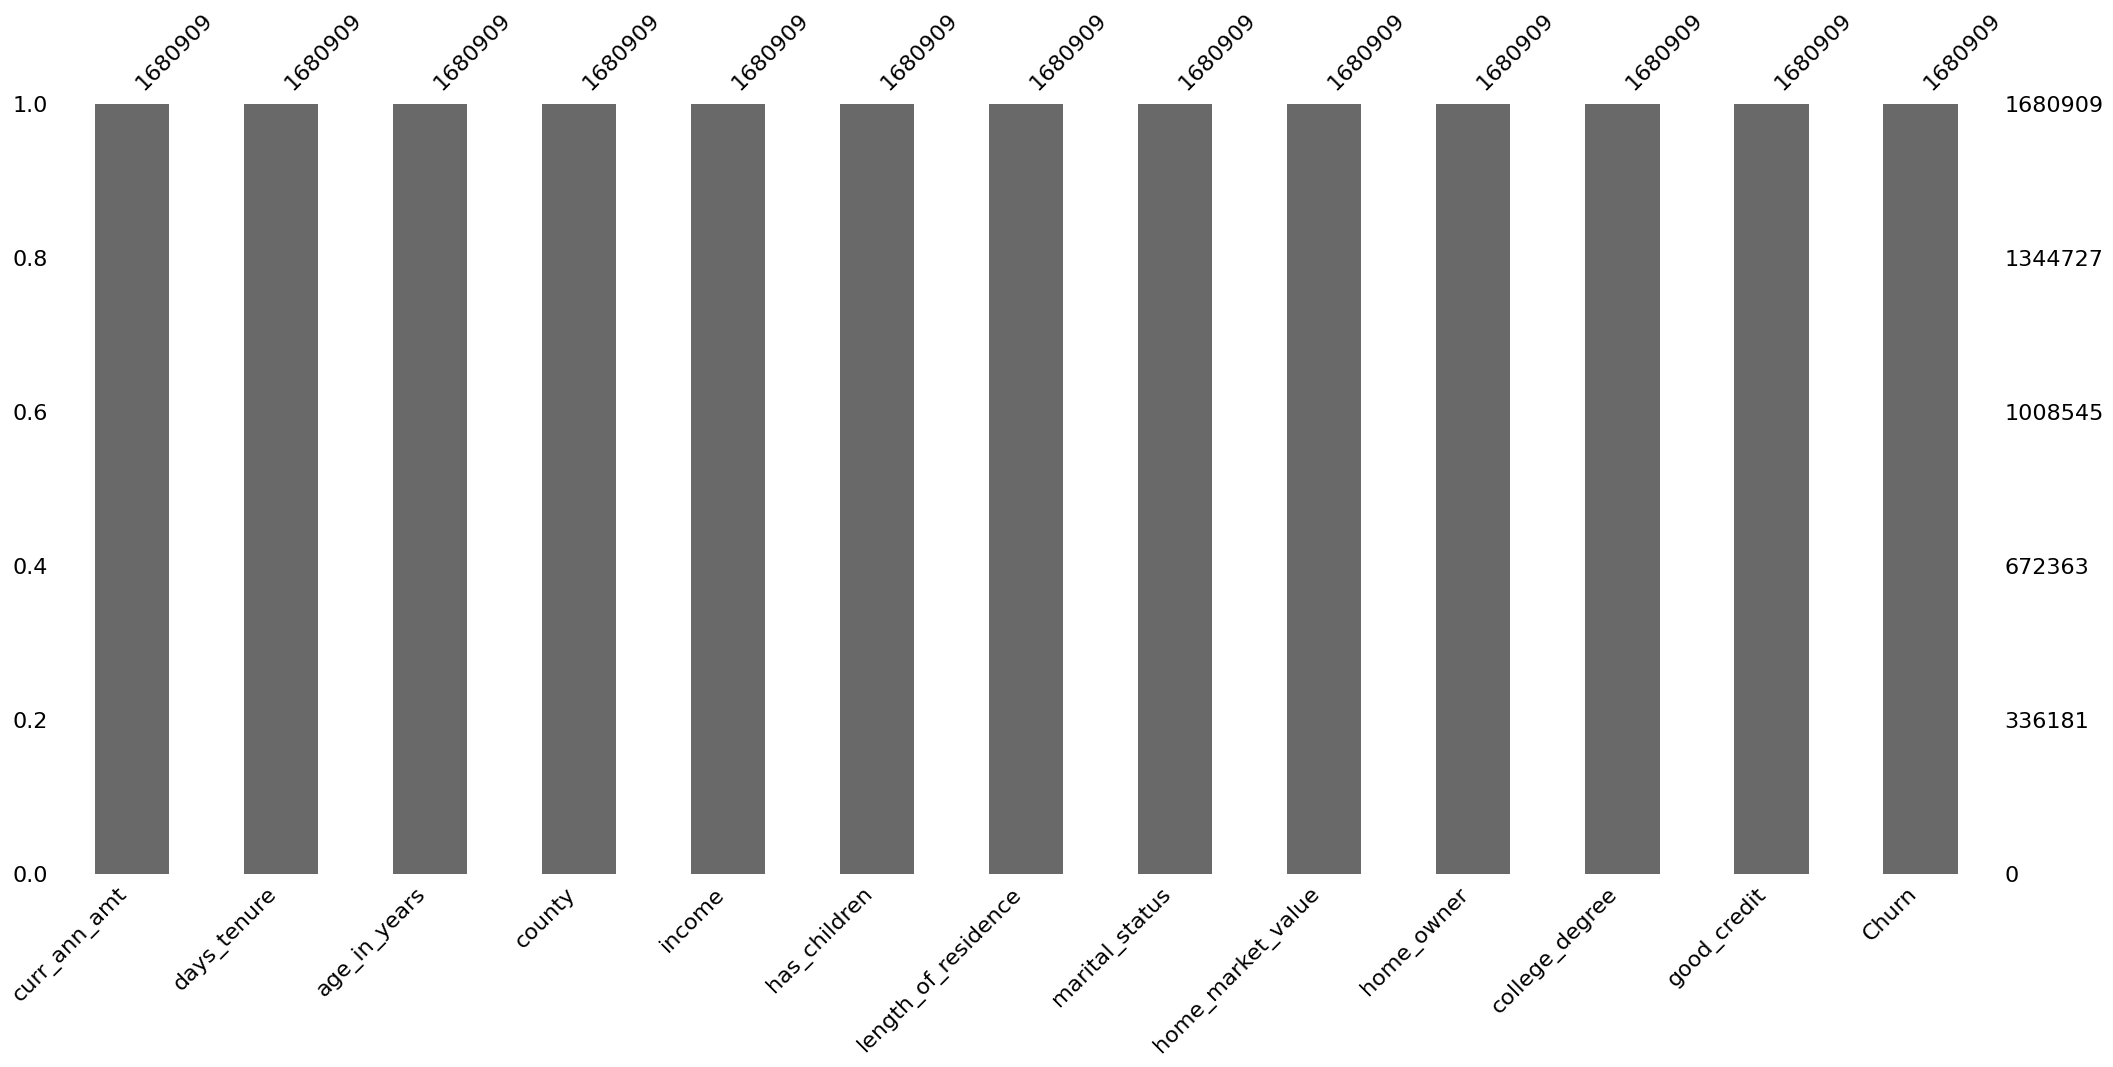

In [9]:
# df.isna().sum()
ms.bar(df)
plt.show()

In [10]:
df['days_tenure'] = df['days_tenure'].fillna(0).astype(int)

In [11]:
binary_cols = ['has_children', 'home_owner', 'college_degree', 'good_credit']
df[binary_cols] = df[binary_cols].astype(int)

In [12]:
# Define a function to format the home_market_value column with proper spacing
def clean_home_market_value(value):
    # Replace '-' with ' to ' (with spaces)
    value = value.replace(' - ', ' to ')  # Make sure to account for spaces around '-'
    # Replace 'Plus' with ' and above' (with space)
    value = value.replace(' Plus', ' and above')
    # Add commas to separate the numbers
    value_parts = value.split()  # Split the string into parts
    for i, part in enumerate(value_parts):
        if part.replace(',', '').isdigit():  # Check if the part is a number
            value_parts[i] = f"{int(part):,}"  # Add commas to the number
    return ' '.join(value_parts)  # Join back the parts with a space

# Apply the function to the 'home_market_value' column
df['home_market_value'] = df['home_market_value'].apply(clean_home_market_value)

# Check the cleaned data
print(df['home_market_value'].unique())

['50,000 to 74,999' '75,000 to 99,999' '175,000 to 199,999'
 '225,000 to 249,999' '125,000 to 149,999' '100,000 to 124,999'
 '25,000 to 49,999' '150,000 to 174,999' '200,000 to 224,999'
 '250,000 to 274,999' '275,000 to 299,999' '400,000 to 449,999'
 '300,000 to 349,999' '1,000,000 and above' '1,000 to 24,999'
 '750,000 to 999,999' '350,000 to 399,999' '500,000 to 749,999'
 '450,000 to 499,999']


In [13]:
for col in df.columns:
    print(f"{col}: \n{df[col].unique()}\n")

curr_ann_amt: 
[ 818.877997  974.199182  967.375112 ... 1255.570597 1104.105051
  829.869558]

days_tenure: 
[1454 1795 4818 ... 2838 4812  658]

age_in_years: 
[ 44  72  55  53  50  33  71  46  56  64  67  41  69  59  60  49  68  38
  54 108  89  35  91  37  36  31  42  88  57  51  39  47  63  78  65  52
  48  75  45  30  77  79  86  32  43  76 106  70  34  27  82  40  93  28
  62  61  74  99  66  58  81  83  73  90  84  85  95  92  94  80  96  29
 100  26  87 107  98 102  97 101  25  24 105 104 103 114 110 109 113  23
 111 112]

county: 
['Kaufman' 'Dallas' 'Tarrant' 'Denton' 'Collin' 'Parker' 'Ellis' 'Navarro'
 'Hunt' 'Johnson' 'Rockwall' 'Cooke' 'Grayson' 'Hill']

income: 
[ 22500.     27500.     42500.    125000.     87500.     52500.
  47500.     32500.     37500.     62500.     57500.     70000.
  17500.     80372.176 162500.    250000.      5000.    225000.
  12500.    187500.   ]

has_children: 
[1 0]

length_of_residence: 
[15.     2.    10.     6.     4.     8.    12.     5.

In [14]:
df.dtypes

curr_ann_amt           float64
days_tenure              int64
age_in_years             int64
county                  object
income                 float64
has_children             int64
length_of_residence    float64
marital_status          object
home_market_value       object
home_owner               int64
college_degree           int64
good_credit              int64
Churn                    int64
dtype: object

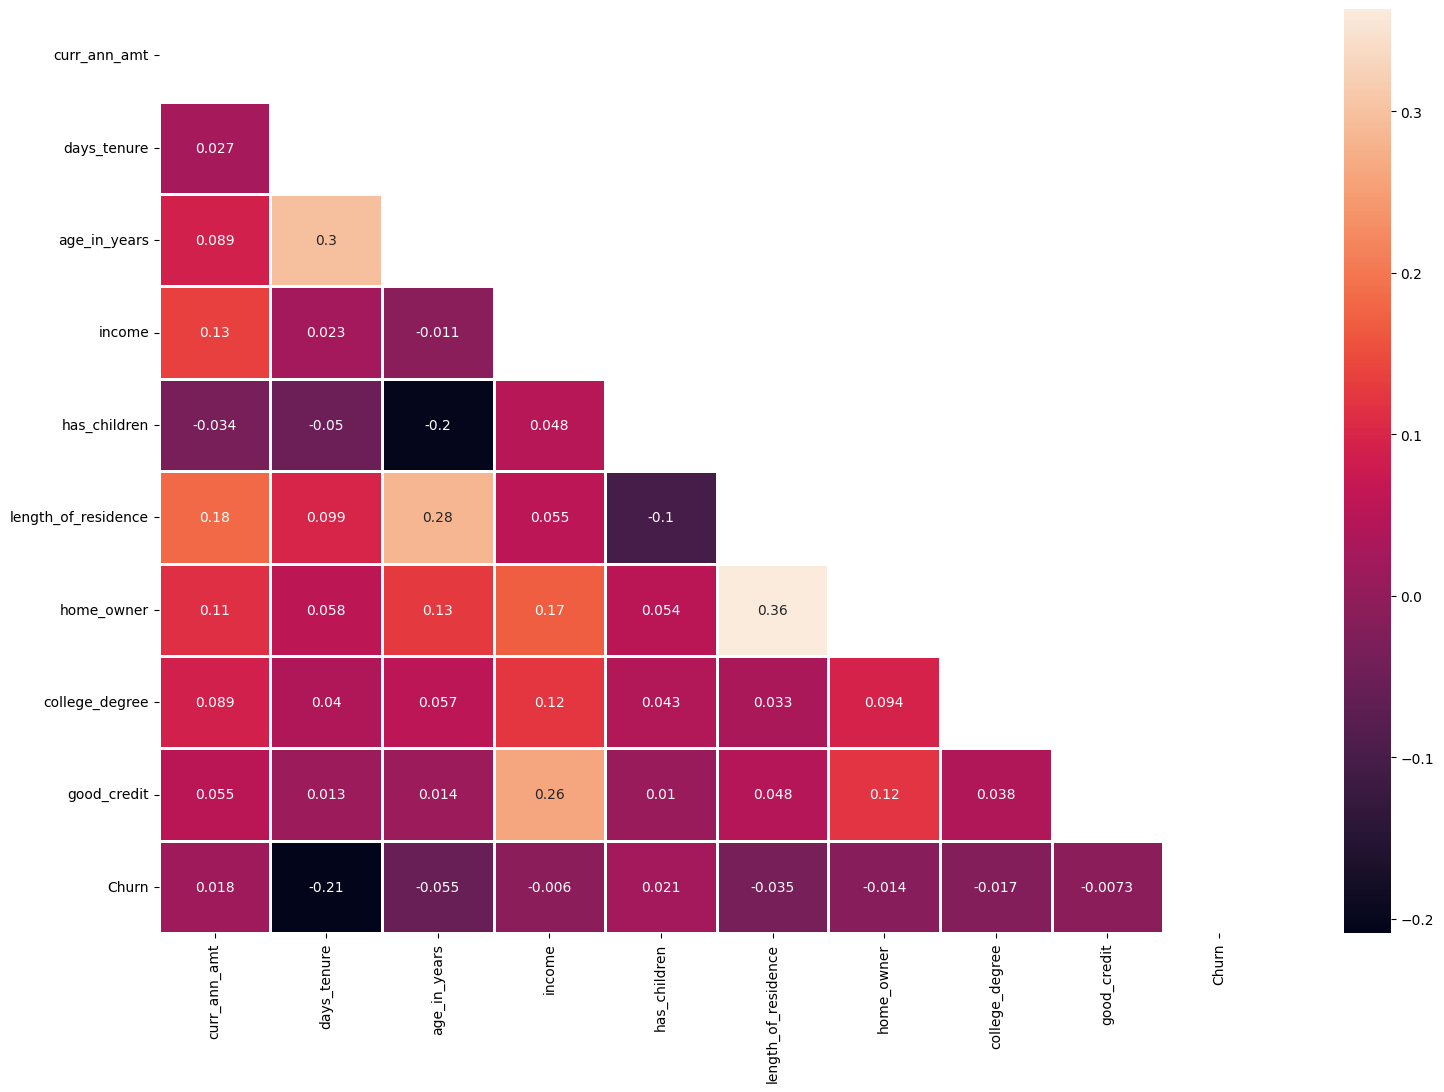

In [15]:
plt.figure(figsize = (18, 12))

corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

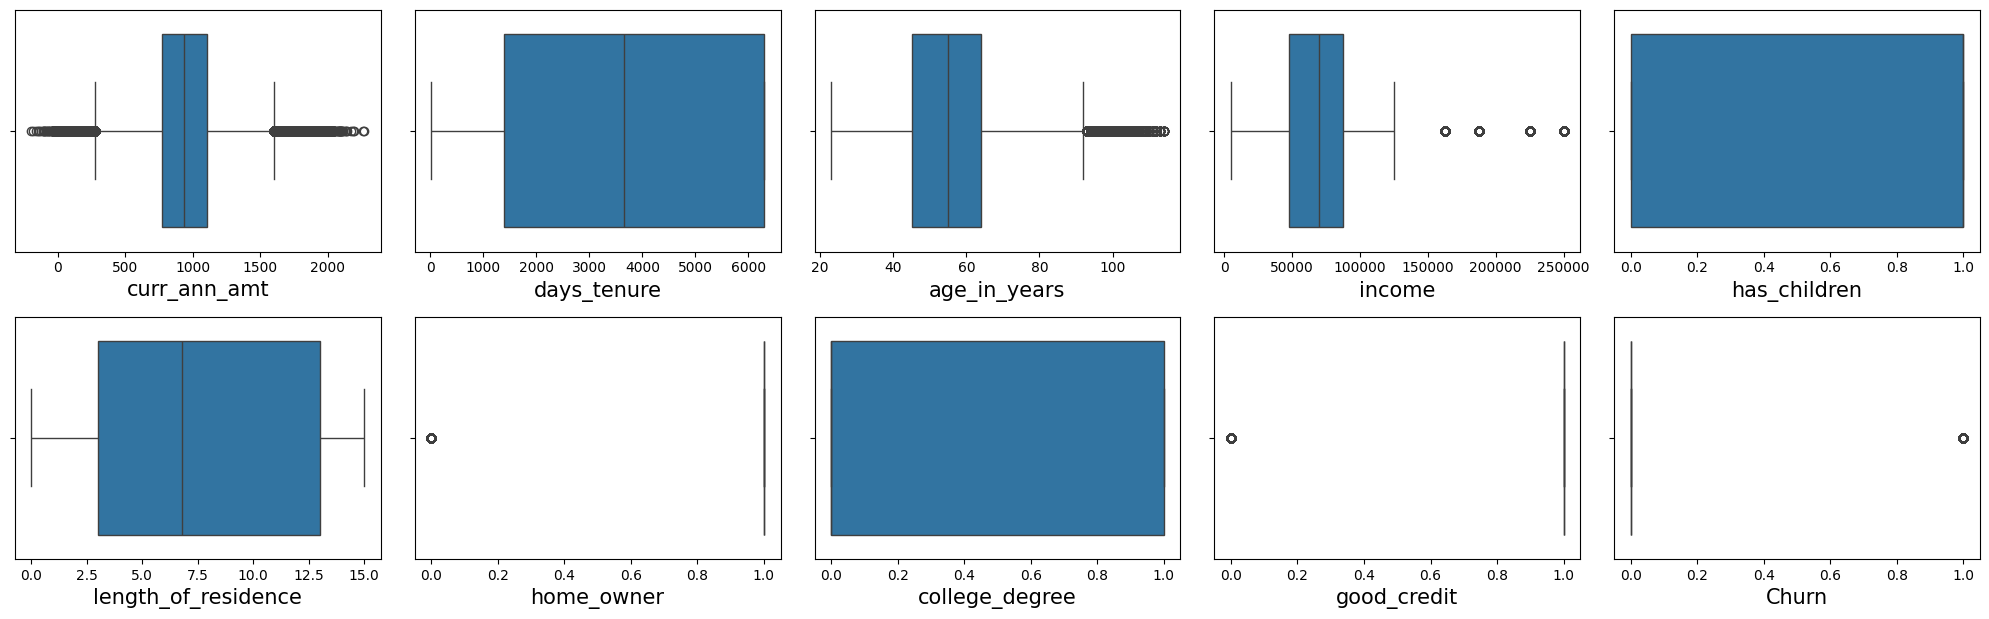

In [16]:
# Filter numerical columns only
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
plotnumber = 1

for col in numerical_columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(x=df[col], ax=ax)  # Use 'x=' to specify the column for boxplot
        plt.xlabel(col, fontsize=15)
    
    plotnumber += 1

plt.tight_layout()
plt.show()

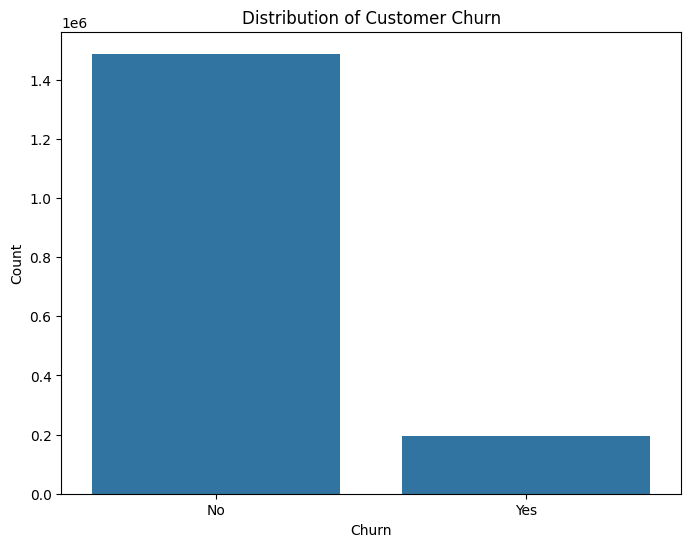

In [17]:
# Plot the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Churn'])
plt.title(f'Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Customize labels if the target is binary (0, 1)
plt.show()

In [18]:
def preprocess_features(data, target_column):
    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Encode the target variable to binary (0 and 1)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Separate numerical and categorical features
    num_df = X.select_dtypes(include=['float64'])
    cat_df = X.select_dtypes(include=['category', 'object'])

    # One-hot encode categorical features, dropping the first category to avoid multicollinearity
    cat_df = pd.get_dummies(cat_df, drop_first=True)

    # Scale numerical features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(num_df)
    scaled_num_df = pd.DataFrame(data=scaled_data, columns=num_df.columns, index=num_df.index)

    # Concatenate scaled numerical features and one-hot encoded categorical features
    X = pd.concat([scaled_num_df, cat_df], axis=1)

    return X, y

# Example usage
X, y = preprocess_features(df, target_column='Churn')

# Display the first few rows of the processed features
X.head()

,curr_ann_amt,income,length_of_residence,county_Cooke,county_Dallas,county_Denton,county_Ellis,county_Grayson,county_Hill,county_Hunt,...,"home_market_value_250,000 to 274,999","home_market_value_275,000 to 299,999","home_market_value_300,000 to 349,999","home_market_value_350,000 to 399,999","home_market_value_400,000 to 449,999","home_market_value_450,000 to 499,999","home_market_value_50,000 to 74,999","home_market_value_500,000 to 749,999","home_market_value_75,000 to 99,999","home_market_value_750,000 to 999,999"
0,-0.492563,-1.084896,1.460164,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.137443,-0.992952,-1.071331,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.109764,-0.717121,0.486512,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.211307,0.799954,-0.292409,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.631464,0.110374,-0.681870,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Function to train and evaluate models
def test_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for model_name, model in models.items():
        print(f'\n{model_name}:')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy:.4f}')
        print('\nClassification Report:')
        print(classification_report(y_test, y_pred))
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred))
        
        # Store results
        results[model_name] = {
            'model': model,
            'accuracy': accuracy,
            'classification_report': classification_report(y_test, y_pred, output_dict=True),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }
    
    return results

# Define models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Test the models
results = test_models(X_train, X_test, y_train, y_test, models)


Logistic Regression:
Accuracy: 0.8854

Classification Report:


g:\cannon insurance\fraud_and_churn_models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\cannon insurance\fraud_and_churn_models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\cannon insurance\fraud_and_churn_models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

              precision    recall  f1-score   support

           0       0.89      1.00      0.94    446501
           1       0.00      0.00      0.00     57772

    accuracy                           0.89    504273
   macro avg       0.44      0.50      0.47    504273
weighted avg       0.78      0.89      0.83    504273

Confusion Matrix:
[[446501      0]
 [ 57772      0]]


g:\cannon insurance\fraud_and_churn_models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\cannon insurance\fraud_and_churn_models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\cannon insurance\fraud_and_churn_models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


Random Forest:
Accuracy: 0.8286

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91    446501
           1       0.12      0.08      0.09     57772

    accuracy                           0.83    504273
   macro avg       0.50      0.50      0.50    504273
weighted avg       0.80      0.83      0.81    504273

Confusion Matrix:
[[413457  33044]
 [ 53402   4370]]

Gradient Boosting:
Accuracy: 0.8854

Classification Report:


g:\cannon insurance\fraud_and_churn_models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\cannon insurance\fraud_and_churn_models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\cannon insurance\fraud_and_churn_models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

              precision    recall  f1-score   support

           0       0.89      1.00      0.94    446501
           1       0.00      0.00      0.00     57772

    accuracy                           0.89    504273
   macro avg       0.44      0.50      0.47    504273
weighted avg       0.78      0.89      0.83    504273

Confusion Matrix:
[[446501      0]
 [ 57772      0]]


g:\cannon insurance\fraud_and_churn_models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\cannon insurance\fraud_and_churn_models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\cannon insurance\fraud_and_churn_models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


XGBoost:
Accuracy: 0.8854

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    446501
           1       0.00      0.00      0.00     57772

    accuracy                           0.89    504273
   macro avg       0.44      0.50      0.47    504273
weighted avg       0.78      0.89      0.83    504273

Confusion Matrix:
[[446498      3]
 [ 57772      0]]

K-Nearest Neighbors:
Accuracy: 0.8752

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93    446501
           1       0.12      0.01      0.02     57772

    accuracy                           0.88    504273
   macro avg       0.50      0.50      0.48    504273
weighted avg       0.80      0.88      0.83    504273

Confusion Matrix:
[[440555   5946]
 [ 56973    799]]

Support Vector Machine:
